<a href="https://colab.research.google.com/github/SuperChini/Brief-sample/blob/main/Qatar_2022_Cup_Champion_Markov_sequence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import statistics as std

import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

import pathlib

import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [8]:
from google.colab import files 
uploaded = files.upload()


Saving Qatar 2022 Worldcup.xlsx to Qatar 2022 Worldcup (1).xlsx


In [9]:
df = (pd.read_excel(io='Qatar 2022 Worldcup.xlsx' ,sheet_name='Zona Clasificación'))
df0 = pd.DataFrame(df)
df0

,Team,Team #,goals for,goals against,won,lost,draws,Verification
0,Qatar,1.0,1,8,0,3,0,3
1,Ecuador,2.0,4,3,1,1,1,3
2,Senegal,3.0,5,4,2,1,0,3
3,Holanda,4.0,3,1,2,0,1,3
4,Inglaterra,5.0,9,2,2,0,1,3
5,Irán,6.0,4,7,1,2,0,3
6,Estados Unidos,7.0,2,1,1,0,2,3
7,Gales,8.0,1,6,0,2,1,3
8,Argentina,9.0,5,2,2,1,0,3
9,Arabia Saudí,10.0,3,5,1,2,0,3


In [10]:
df = (pd.read_excel(io='Qatar 2022 Worldcup.xlsx' ,sheet_name='Octavos de final'))
df1 = pd.DataFrame(df)
df1

,Team,Team #,goals for,goals against,won,lost,draws,Verification
0,Japón,20.0,5.0,3.0,2,1,1,4
1,Croacia,24.0,5.0,1.0,1,0,3,4
2,Senegal,3.0,5.0,7.0,2,2,0,4
3,Holanda,4.0,6.0,2.0,3,0,1,4
4,Inglaterra,5.0,12.0,2.0,3,0,1,4
5,Brasil,25.0,7.0,2.0,3,1,0,4
6,Estados Unidos,7.0,3.0,4.0,1,1,2,4
7,Corea del Sur,32.0,5.0,8.0,1,2,1,4
8,Argentina,9.0,7.0,3.0,3,1,0,4
9,Marruecos,23.0,4.0,1.0,2,0,2,4


In [11]:
import time

start = time.time()

df1["Goals_For_RATIO"] = df1["goals for"]/ (df1["goals for"] + df1["goals against"]) 
df1["Goals_Against_RATIO"] = df1["goals against"]/ (df1["goals for"] + df1["goals against"])

df1["WIN_PROB"] = df1["won"]/ (df1["won"] + df1["lost"] + df1["draws"])
df1["LOSE_PROB"] = df1["lost"]/ (df1["won"] + df1["lost"] + df1["draws"])
df1["DRAW_PROB"] = df1["draws"]/ (df1["won"] + df1["lost"] + df1["draws"])

end = time.time()

print("Delay of the vectorized process =", end - start, "[sec]")
print('\n')

df1


Delay of the vectorized process = 0.01146554946899414 [sec]




,Team,Team #,goals for,goals against,won,lost,draws,Verification,Goals_For_RATIO,Goals_Against_RATIO,WIN_PROB,LOSE_PROB,DRAW_PROB
0,Japón,20.0,5.0,3.0,2,1,1,4,0.625000,0.375000,0.500000,0.250000,0.25000
1,Croacia,24.0,5.0,1.0,1,0,3,4,0.833333,0.166667,0.250000,0.000000,0.75000
2,Senegal,3.0,5.0,7.0,2,2,0,4,0.416667,0.583333,0.500000,0.500000,0.00000
3,Holanda,4.0,6.0,2.0,3,0,1,4,0.750000,0.250000,0.750000,0.000000,0.25000
4,Inglaterra,5.0,12.0,2.0,3,0,1,4,0.857143,0.142857,0.750000,0.000000,0.25000
5,Brasil,25.0,7.0,2.0,3,1,0,4,0.777778,0.222222,0.750000,0.250000,0.00000
6,Estados Unidos,7.0,3.0,4.0,1,1,2,4,0.428571,0.571429,0.250000,0.250000,0.50000
7,Corea del Sur,32.0,5.0,8.0,1,2,1,4,0.384615,0.615385,0.250000,0.500000,0.25000
8,Argentina,9.0,7.0,3.0,3,1,0,4,0.700000,0.300000,0.750000,0.250000,0.00000
9,Marruecos,23.0,4.0,1.0,2,0,2,4,0.800000,0.200000,0.500000,0.000000,0.50000


In [12]:
df = (pd.read_excel(io='Qatar 2022 Worldcup.xlsx' ,sheet_name='Cuartos de final'))
df2 = pd.DataFrame(df)
df2

,Team,Team #,goals for,goals against,won,lost,draws,Verification
0,Argentina,9.0,9.0,5.0,4,1,0,5
1,Croacia,24.0,1.0,2.0,2,0,3,5
2,Francia,13.0,11.0,5.0,4,1,0,5
3,Holanda,4.0,8.0,4.0,3,1,1,5
4,Inglaterra,5.0,13.0,4.0,3,1,1,5
5,Brasil,25.0,1.0,3.0,3,2,0,5
6,Portugal,29.0,12.0,6.0,3,2,0,5
7,Marruecos,23.0,5.0,1.0,3,0,2,5
8,NaN,NaN,NaN,NaN,25,8,7,40


In [13]:
import time

start = time.time()

df2["Goals_For_RATIO"] = df2["goals for"]/ (df2["goals for"] + df2["goals against"]) 
df2["Goals_Against_RATIO"] = df2["goals against"]/ (df2["goals for"] + df2["goals against"])

df2["WIN_PROB"] = df2["won"]/ (df2["won"] + df2["lost"] + df2["draws"])
df2["LOSE_PROB"] = df2["lost"]/ (df1["won"] + df2["lost"] + df2["draws"])
df2["DRAW_PROB"] = df2["draws"]/ (df2["won"] + df2["lost"] + df2["draws"])

end = time.time()

print("Delay of the vectorized process =", end - start, "[sec]")
print('\n')

df2

Delay of the vectorized process = 0.018496274948120117 [sec]




,Team,Team #,goals for,goals against,won,lost,draws,Verification,Goals_For_RATIO,Goals_Against_RATIO,WIN_PROB,LOSE_PROB,DRAW_PROB
0,Argentina,9.0,9.0,5.0,4,1,0,5,0.642857,0.357143,0.800,0.333333,0.000
1,Croacia,24.0,1.0,2.0,2,0,3,5,0.333333,0.666667,0.400,0.000000,0.600
2,Francia,13.0,11.0,5.0,4,1,0,5,0.687500,0.312500,0.800,0.333333,0.000
3,Holanda,4.0,8.0,4.0,3,1,1,5,0.666667,0.333333,0.600,0.200000,0.200
4,Inglaterra,5.0,13.0,4.0,3,1,1,5,0.764706,0.235294,0.600,0.200000,0.200
5,Brasil,25.0,1.0,3.0,3,2,0,5,0.250000,0.750000,0.600,0.400000,0.000
6,Portugal,29.0,12.0,6.0,3,2,0,5,0.666667,0.333333,0.600,0.666667,0.000
7,Marruecos,23.0,5.0,1.0,3,0,2,5,0.833333,0.166667,0.600,0.000000,0.400
8,NaN,NaN,NaN,NaN,25,8,7,40,NaN,NaN,0.625,0.444444,0.175


In [14]:
df = (pd.read_excel(io='Qatar 2022 Worldcup.xlsx' ,sheet_name='Semi finales'))
df3 = pd.DataFrame(df)
df3

,Team,Team #,goals for,goals against,won,lost,draws,Verification
0,Argentina,9.0,12.0,5.0,5,1,0,6
1,Croacia,24.0,1.0,5.0,2,1,3,6
2,Francia,13.0,13.0,5.0,5,1,0,6
3,Marruecos,23.0,5.0,3.0,3,1,2,6
4,NaN,NaN,NaN,NaN,15,4,5,24


In [15]:
import time

start = time.time()

df3["Goals_For_RATIO"] = df3["goals for"]/ (df3["goals for"] + df3["goals against"]) 
df3["Goals_Against_RATIO"] = df3["goals against"]/ (df3["goals for"] + df3["goals against"])

df3["WIN_PROB"] = df3["won"]/ (df3["won"] + df3["lost"] + df3["draws"])
df3["LOSE_PROB"] = df3["lost"]/ (df3["won"] + df3["lost"] + df3["draws"])
df3["DRAW_PROB"] = df3["draws"]/ (df3["won"] + df3["lost"] + df3["draws"])

end = time.time()

print("Delay of the vectorized process =", end - start, "[sec]")
print('\n')

df3

Delay of the vectorized process = 0.011812210083007812 [sec]




,Team,Team #,goals for,goals against,won,lost,draws,Verification,Goals_For_RATIO,Goals_Against_RATIO,WIN_PROB,LOSE_PROB,DRAW_PROB
0,Argentina,9.0,12.0,5.0,5,1,0,6,0.705882,0.294118,0.833333,0.166667,0.000000
1,Croacia,24.0,1.0,5.0,2,1,3,6,0.166667,0.833333,0.333333,0.166667,0.500000
2,Francia,13.0,13.0,5.0,5,1,0,6,0.722222,0.277778,0.833333,0.166667,0.000000
3,Marruecos,23.0,5.0,3.0,3,1,2,6,0.625000,0.375000,0.500000,0.166667,0.333333
4,NaN,NaN,NaN,NaN,15,4,5,24,NaN,NaN,0.625000,0.166667,0.208333


In [16]:
print('\n')
print("                      <<<  Partido a disputarse - Pronóstico  >>>")
print('\n')

df = (pd.read_excel(io='Qatar 2022 Worldcup.xlsx' ,sheet_name='Final'))
df4 = pd.DataFrame(df)
df4



                      <<<  Partido a disputarse - Pronóstico  >>>




,Team,Team #,goals for,goals against,won,lost,draws,Verification
0,Argentina,9,12,5,5,1,0,6
1,Francia,13,13,5,5,1,0,6


In [17]:
import time

start = time.time()

df0["Goals_For_RATIO"] = df0["goals for"]/ (df0["goals for"] + df0["goals against"]) 
df0["Goals_Against_RATIO"] = df0["goals against"]/ (df0["goals for"] + df0["goals against"])

df0["WIN_PROB"] = df0["won"]/ (df0["won"] + df0["lost"] + df0["draws"])
df0["LOSE_PROB"] = df0["lost"]/ (df0["won"] + df0["lost"] + df0["draws"])
df0["DRAW_PROB"] = df0["draws"]/ (df0["won"] + df0["lost"] + df0["draws"])

#df0 = df0.drop(columns = ['Prob_0_WIN','Prob_0_LOSE'])

end = time.time()

print("Delay of the vectorized process =", end - start, "[sec]")
print('\n')

df0


Delay of the vectorized process = 0.006718158721923828 [sec]




,Team,Team #,goals for,goals against,won,lost,draws,Verification,Goals_For_RATIO,Goals_Against_RATIO,WIN_PROB,LOSE_PROB,DRAW_PROB
0,Qatar,1.0,1,8,0,3,0,3,0.111111,0.888889,0.000000,1.000000,0.000000
1,Ecuador,2.0,4,3,1,1,1,3,0.571429,0.428571,0.333333,0.333333,0.333333
2,Senegal,3.0,5,4,2,1,0,3,0.555556,0.444444,0.666667,0.333333,0.000000
3,Holanda,4.0,3,1,2,0,1,3,0.750000,0.250000,0.666667,0.000000,0.333333
4,Inglaterra,5.0,9,2,2,0,1,3,0.818182,0.181818,0.666667,0.000000,0.333333
5,Irán,6.0,4,7,1,2,0,3,0.363636,0.636364,0.333333,0.666667,0.000000
6,Estados Unidos,7.0,2,1,1,0,2,3,0.666667,0.333333,0.333333,0.000000,0.666667
7,Gales,8.0,1,6,0,2,1,3,0.142857,0.857143,0.000000,0.666667,0.333333
8,Argentina,9.0,5,2,2,1,0,3,0.714286,0.285714,0.666667,0.333333,0.000000
9,Arabia Saudí,10.0,3,5,1,2,0,3,0.375000,0.625000,0.333333,0.666667,0.000000


In [18]:
print('\n')
df0_Arg = df0.loc[df0['Team'] == 'Argentina']
df0_Arg_initialProbVector = df0_Arg[['WIN_PROB', 'LOSE_PROB', 'DRAW_PROB']]
print("Vector de probabilidad inicial: ARGENTINA")
print(df0_Arg_initialProbVector)
print('\n')

df0_Aust = df0.loc[df0['Team'] == 'Australia']
df0_Aust_initialProbVector = df0_Aust[['WIN_PROB', 'LOSE_PROB', 'DRAW_PROB']]
df0_Aust_initialProbVector
print("Vector de probabilidad inicial: AUSTRALIA")
print(df0_Aust_initialProbVector)
print('\n')

df0_Holl = df0.loc[df0['Team'] == 'Holanda']
df0_Holl_initialProbVector = df0_Holl[['WIN_PROB', 'LOSE_PROB', 'DRAW_PROB']]
df0_Holl_initialProbVector
print("Vector de probabilidad inicial: HOLANDA")
print(df0_Holl_initialProbVector)
print('\n')

df0_Cr = df0.loc[df0['Team'] == 'Croacia']
df0_Cr_initialProbVector = df0_Cr[['WIN_PROB', 'LOSE_PROB', 'DRAW_PROB']]
df0_Cr_initialProbVector
print("Vector de probabilidad inicial: CROACIA")
print(df0_Cr_initialProbVector)
print('\n')




Vector de probabilidad inicial: ARGENTINA
   WIN_PROB  LOSE_PROB  DRAW_PROB
8  0.666667   0.333333        0.0


Vector de probabilidad inicial: AUSTRALIA
    WIN_PROB  LOSE_PROB  DRAW_PROB
13  0.666667   0.333333        0.0


Vector de probabilidad inicial: HOLANDA
   WIN_PROB  LOSE_PROB  DRAW_PROB
3  0.666667        0.0   0.333333


Vector de probabilidad inicial: CROACIA
    WIN_PROB  LOSE_PROB  DRAW_PROB
23  0.333333        0.0   0.666667




In [19]:
import random

print('\n')
df0_Fr = df0.loc[df0['Team'] == 'Francia']
df0_Fr_initialProbVector = df0_Fr[['WIN_PROB', 'LOSE_PROB', 'DRAW_PROB']]
print("Vector de probabilidad inicial: FRANCIA")
print(df0_Fr_initialProbVector)
print('\n')

df0_Pol = df0.loc[df0['Team'] == 'Polonia']
df0_Pol_initialProbVector = df0_Pol[['WIN_PROB', 'LOSE_PROB', 'DRAW_PROB']]
df0_Pol_initialProbVector
print("Vector de probabilidad inicial: POLONIA")
print(df0_Pol_initialProbVector)
print('\n')

df0_Eng = df0.loc[df0['Team'] == 'Inglaterra']
df0_Eng_initialProbVector = df0_Eng[['WIN_PROB', 'LOSE_PROB', 'DRAW_PROB']]
df0_Eng_initialProbVector
print("Vector de probabilidad inicial: INGLATERRA")
print(df0_Eng_initialProbVector)
print('\n')

df0_Mor = df0.loc[df0['Team'] == 'Marruecos']
df0_Mor_initialProbVector = df0_Mor[['WIN_PROB', 'LOSE_PROB', 'DRAW_PROB']]
df0_Mor_initialProbVector
print("Vector de probabilidad inicial: MARRUECOS")
print(df0_Mor_initialProbVector)
print('\n')

A = np.random.random((3,3))

print('Matriz Aleatoria \'A\'=')
print(A)
print('\n')

transitionMarkov = np.dot(df0_Mor_initialProbVector, A)
print('v0_(MARRUECOS) * A =', transitionMarkov)





Vector de probabilidad inicial: FRANCIA
    WIN_PROB  LOSE_PROB  DRAW_PROB
12  0.666667   0.333333        0.0


Vector de probabilidad inicial: POLONIA
    WIN_PROB  LOSE_PROB  DRAW_PROB
11  0.333333   0.333333   0.333333


Vector de probabilidad inicial: INGLATERRA
   WIN_PROB  LOSE_PROB  DRAW_PROB
4  0.666667        0.0   0.333333


Vector de probabilidad inicial: MARRUECOS
    WIN_PROB  LOSE_PROB  DRAW_PROB
22  0.666667        0.0   0.333333


Matriz Aleatoria 'A'=
[[0.45392701 0.45217717 0.89225195]
 [0.21297951 0.4964187  0.34104943]
 [0.20452487 0.66501906 0.67000144]]


v0_(MARRUECOS) * A = [[0.37079296 0.52312447 0.81816845]]


In [2]:
from google.colab import files 
uploaded = files.upload()


Saving Qatar 2022 Worldcup.xlsx to Qatar 2022 Worldcup.xlsx


In [3]:
import pandas as pd 

df = (pd.read_excel(io='Qatar 2022 Worldcup.xlsx' ,sheet_name='Hoja de Probabilidades'))
df4 = pd.DataFrame(df)

df4

,Team,Opponent,goals for,goals against,goals draw,won,lost,draws,Verification
0,Argentina,Arabia Saudita,1,2,0,0,1,0,1
1,Argentina,México,2,0,0,1,0,0,1
2,Argentina,Polonia,2,0,0,1,0,0,1
3,Argentina,Australia,2,1,0,1,0,0,1
4,Argentina,Holanda,4,3,0,1,0,0,1
5,Argentina,Croacia,3,0,0,1,0,0,1
6,Francia,Australia,4,1,0,1,0,0,1
7,Francia,Dinamarca,2,1,0,1,0,0,1
8,Francia,Túnez,0,1,0,0,1,0,1
9,Francia,Polonia,3,1,0,1,0,0,1




Lista de resultados de Argentina y de Francia, hasta las semifinales:


Argentina - Arabia Saudita     ( 1 - 2 )


Argentina - México     ( 2 - 0 )


Argentina - Polonia     ( 2 - 0 )


Argentina - Australia     ( 2 - 1 )


Argentina - Holanda     ( 4 - 3 )


Argentina - Croacia     ( 3 - 0 )


Francia - Australia     ( 4 - 1 )


Francia - Dinamarca     ( 2 - 1 )


Francia - Túnez     ( 0 - 1 )


Francia - Polonia     ( 3 - 1 )


Francia - Inglaterra     ( 2 - 1 )


Francia - Marruecos     ( 2 - 0 )




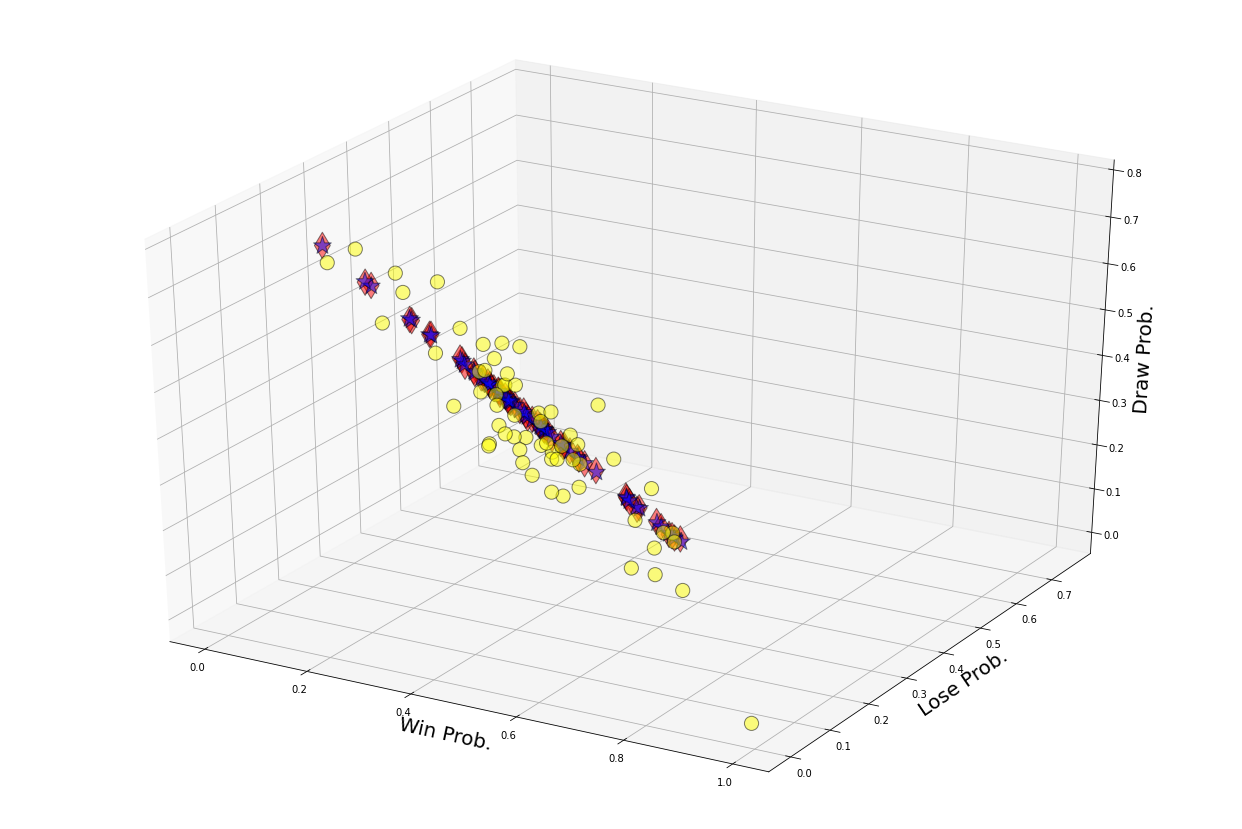

Mean Input  Random Vector = [ 0.3621988044997377 0.30057581895087704 0.3372253765493853 ]


Mean Argent Random Vector = [ 0.3308982404114274 0.33187638303918715 0.3372253765493853 ]


Mean France Random Vector = [ 0.33036026196615964 0.33241436148445497 0.3372253765493853 ]


Mean diff.Vect (Arg - Fr) = [ 0.0005379784452677616 -0.0005379784452678171 0.0 ]




Random  Input Vector of Maximums = [ 0.9933735164444825 0.7565310150147744 0.7655152767410028 ]


Random Vector of Maximums of Arg = [ 0.48891785129432075 0.5046820908302633 0.7655152767410028 ]


Random Vector of Maximuns of Fra = [ 0.48823788371895516 0.5133524225750317 0.7655152767410028 ]


R. Vector of diff.Max (Arg - Fr) = [ 0.000679967575365592 -0.00867033174476839 0.0 ]




Random  Input Vector of Minimums = [ 0.0033801171837363826 0.00022642568010169812 0.00640005787541587 ]


Random Vector of Minimums of Arg = [ 0.11642185684015449 0.11806286641884256 0.7655152767410028 ]


Random Vector of Minimums of Fra = [ 0.11551930

,Team,Opponent,goals for,goals against,goals draw,won,lost,draws,Verification,p11,p12,p13
0,Argentina,Arabia Saudita,1,2,0,0,1,0,1,0.333333,0.666667,0.0
1,Argentina,México,2,0,0,1,0,0,1,1.000000,0.000000,0.0
2,Argentina,Polonia,2,0,0,1,0,0,1,1.000000,0.000000,0.0
3,Argentina,Australia,2,1,0,1,0,0,1,0.666667,0.333333,0.0
4,Argentina,Holanda,4,3,0,1,0,0,1,0.571429,0.428571,0.0
5,Argentina,Croacia,3,0,0,1,0,0,1,1.000000,0.000000,0.0


In [6]:
import random as rd
import matplotlib.pyplot as plt
import numpy as np

df4['p11'] = df4['goals for']/(df4['goals for'] + df4['goals against'] + df4['goals draw'])
df4['p12'] = df4['goals against']/(df4['goals for'] + df4['goals against'] + df4['goals draw'])
df4['p13'] = df4['goals draw']/(df4['goals for'] + df4['goals against'] + df4['goals draw'])

def randomVector():
 v_Arg = np.random.rand(3)
 normaVectorAleatorio_de_ProbabilidadInicial = np.linalg.norm(v_Arg)
 #print(normaVectorAleatorio_de_ProbabilidadInicial)
 #print('\n')

 v_Arg = v_Arg/np.linalg.norm(v_Arg, 1)
 normaVectorAleatorio_de_ProbabilidadInicial = np.linalg.norm(v_Arg)
 #print(normaVectorAleatorio_de_ProbabilidadInicial)
 #print('\n')
 v_0_Arg = v_Arg

 vectorEstocástico = v_Arg[0] + v_Arg[1] + v_Arg[2]
 #print(vectorEstocástico)
 #print('\n')


 v_Fr = np.random.rand(3)
 normaVectorAleatorio_de_ProbabilidadInicial = np.linalg.norm(v_Fr)
 #print(normaVectorAleatorio_de_ProbabilidadInicial)
 #print('\n')

 v_Fr = v_Fr/np.linalg.norm(v_Fr, 1)
 normaVectorAleatorio_de_ProbabilidadInicial = np.linalg.norm(v_Fr)
 #print(normaVectorAleatorio_de_ProbabilidadInicial)
 #print('\n')
 
 v_Fr = v_Arg

 

 vectorEstocástico = v_Fr[0] + v_Fr[1] + v_Fr[2]
 #print(vectorEstocástico)
 #print('\n')


 #print("La sucesión de Vectores de Probabilidad 'w' para cada uno de los partidos disputados en la copa")
 #print("(i.e: en c/u de los pasos de la Cadena de Markov), es la siguiente:" )
 #print('\n')

 #print(type(df4['Team']))

 return(v_Arg)


 print('\n')

print('\n')
print('Lista de resultados de Argentina y de Francia, hasta las semifinales:')
print('\n')

for i in range(0,len(df4)):
   
   print(df4['Team'][i], '-', df4['Opponent'][i], '    (', df4['goals for'][i] , '-', df4['goals against'][i], ')')
   #print(type(df4['Team'][i]))
   print('\n')


listRandomX = []
listRandomY = []
listRandomZ = []

listRandomX_Arg = []
listRandomY_Arg = []
listRandomZ_Arg = []

listRandomX_Fr = []
listRandomY_Fr = []
listRandomZ_Fr = []

for j in range(60):
 
 v_Arg = randomVector()
 v_Fr = v_Arg

 listRandomX.append(v_Arg[0])
 
 listRandomY.append(v_Arg[1])
 
 listRandomZ.append(v_Arg[2])

 #print(listRandomX)
 #print(listRandomY)
 #print('\n')

 for i in range(0,len(df4)):

   MarkovMatrix = [[df4['p11'][i], df4['p12'][i], df4['p13'][i]] , [df4['p12'][i], df4['p11'][i], df4['p13'][i]] , [df4['p13'][i], df4['p13'][i], 1 - 2 * df4['p13'][i]]]
  
   if df4['Team'][i] == 'Argentina':
 
    #print("Vector en el PASO PRESENTE =", v_Arg)         # en el paso presente
    #print('\n')

    v_Arg = np.dot(v_Arg, MarkovMatrix)  
    #print(MarkovMatrix)
    #print('\n')
  
    #print("Vector PREDICIENDO EL PRÓXIMO PASO =", v_Arg)   # habiendo sido afectado por la matríz de transición de Markov
  
   #print('\n')
   #print('-------------------------------------------------------------------------------------')

   if df4['Team'][i] == 'Francia':
  
    #print("Vector en el PASO PRESENTE =", v_Fr)         # en el paso presente
    #print('\n')
  
    v_Fr = np.dot(v_Fr, MarkovMatrix)  
    #print(MarkovMatrix)
    #print('\n')
   
    #print("Vector PREDICIENDO EL PRÓXIMO PASO =", v_Fr)   # habiendo sido afectado por la matríz de transición de Markov
    #print('\n')
   
   #print('\n')
   #print('-------------------------------------------------------------------------------------')


#print(listRandomX)
#print(listRandomY)

 
 listRandomX_Fr.append(v_Fr[0])
 
 listRandomY_Fr.append(v_Fr[1])
 
 listRandomZ_Fr.append(v_Fr[2])

 
 listRandomX_Arg.append(v_Arg[0])
 
 listRandomY_Arg.append(v_Arg[1])
 
 listRandomZ_Arg.append(v_Arg[2])

#print('\n')

fig = plt.figure(figsize = (22,15))
ax = fig.add_subplot(projection='3d')

ax.set_ylabel('Lose Prob.', size = 20)
ax.set_xlabel('Win Prob.', size = 20)
ax.set_zlabel('Draw Prob.', size = 20)

ax.scatter3D( listRandomX_Arg, listRandomY_Arg, listRandomZ_Arg, color = 'blue', alpha = 0.5, edgecolor = 'black', s = 350, marker ='*')
ax.scatter3D( listRandomX_Fr, listRandomY_Fr, listRandomZ_Fr, color = 'red', alpha = 0.5, edgecolor = 'black', s = 350, marker = 'd')
ax.scatter3D(listRandomX, listRandomY, listRandomZ, color = 'yellow', edgecolor = 'black', s = 200, alpha = 0.5)

#for i in range(0, len(listRandomX)):

plt.show()

winMeanRandomVector = np.mean(listRandomX)
loseMeanRandomVector = np.mean(listRandomY)
drawMeanRandomVector = np.mean(listRandomZ)

winMaxRandomVector = np.max(listRandomX)
loseMaxRandomVector = np.max(listRandomY)
drawMaxRandomVector = np.max(listRandomZ)

winMinRandomVector = np.min(listRandomX)
loseMinRandomVector = np.min(listRandomY)
drawMinRandomVector = np.min(listRandomZ)



winMeanRandomVector_Arg = np.mean(listRandomX_Arg)
loseMeanRandomVector_Arg = np.mean(listRandomY_Arg)
drawMeanRandomVector_Arg = np.mean(listRandomZ_Arg)

winMaxRandomVector_Arg = np.max(listRandomX_Arg)
loseMaxRandomVector_Arg = np.max(listRandomY_Arg)
drawMaxRandomVector_Arg = np.max(listRandomZ_Arg)

winMinRandomVector_Arg = np.min(listRandomX_Arg)
loseMinRandomVector_Arg = np.min(listRandomY_Arg)
drawMinRandomVector_Arg = np.max(listRandomZ_Arg)



winMeanRandomVector_Fr = np.mean(listRandomX_Fr)
loseMeanRandomVector_Fr = np.mean(listRandomY_Fr)
drawMeanRandomVector_Fr = np.mean(listRandomZ_Fr)

winMaxRandomVector_Fr = np.max(listRandomX_Fr)
loseMaxRandomVector_Fr = np.max(listRandomY_Fr)
drawMaxRandomVector_Fr = np.max(listRandomZ_Fr)

winMinRandomVector_Fr = np.min(listRandomX_Fr)
loseMinRandomVector_Fr = np.min(listRandomY_Fr)
drawMinRandomVector_Fr = np.min(listRandomZ_Fr)



print('Mean Input  Random Vector = [', winMeanRandomVector, loseMeanRandomVector, drawMeanRandomVector, ']')
print('\n')
print('Mean Argent Random Vector = [', winMeanRandomVector_Arg, loseMeanRandomVector_Arg, drawMeanRandomVector_Arg, ']')
print('\n')
print('Mean France Random Vector = [', winMeanRandomVector_Fr, loseMeanRandomVector_Fr, drawMeanRandomVector_Fr, ']')
print('\n')
print('Mean diff.Vect (Arg - Fr) = [', winMeanRandomVector_Arg - winMeanRandomVector_Fr, loseMeanRandomVector_Arg - loseMeanRandomVector_Fr, drawMeanRandomVector_Arg - drawMeanRandomVector_Fr, ']')
print('\n')
print('\n')

print('Random  Input Vector of Maximums = [', winMaxRandomVector, loseMaxRandomVector, drawMaxRandomVector, ']')
print('\n')
print('Random Vector of Maximums of Arg = [', winMaxRandomVector_Arg, loseMaxRandomVector_Arg, drawMaxRandomVector_Arg, ']')
print('\n')
print('Random Vector of Maximuns of Fra = [', winMaxRandomVector_Fr, loseMaxRandomVector_Fr, drawMaxRandomVector_Fr, ']')
print('\n')
print('R. Vector of diff.Max (Arg - Fr) = [', winMaxRandomVector_Arg - winMaxRandomVector_Fr, loseMaxRandomVector_Arg - loseMaxRandomVector_Fr, drawMaxRandomVector_Arg - drawMaxRandomVector_Fr, ']')
print('\n')
print('\n')

print('Random  Input Vector of Minimums = [', winMinRandomVector, loseMinRandomVector, drawMinRandomVector, ']')
print('\n')
print('Random Vector of Minimums of Arg = [', winMinRandomVector_Arg, loseMinRandomVector_Arg, drawMinRandomVector_Arg,']')
print('\n')
print('Random Vector of Minimums of Fra = [', winMinRandomVector_Fr, loseMinRandomVector_Fr, drawMinRandomVector_Fr, ']')
print('\n')
print('R. Vector of diff.min (Arg - Fr) = [', winMinRandomVector_Arg - winMinRandomVector_Fr, loseMinRandomVector_Arg - loseMinRandomVector_Fr, drawMinRandomVector_Arg - drawMinRandomVector_Fr, ']')
print('\n')
print('\n')



print("Partiendo de los Vectores Iniciales de Probabilidad:")
print('\n')
print("v_Arg =", v_Arg)
print("v_Fra =", v_Arg)
print('\n')
print("Vector Final de Probabilidad para Argentina =", v_Arg)
print("y Vector Final de Probabilidad para Francia =", v_Fr)
print('\n')



df4[df4.Team == 'Argentina']
#df4[df4.Team == 'Francia']
